In [10]:
import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.misc import imread
import matplotlib as mpl

%matplotlib inline

Будем использовать данные о пассажирах титаника

Данные можно скачать по ссылке https://www.kaggle.com/c/titanic

в файле train.csv каждая строчка наборов данных содержит следующие поля:

Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

Name — имя;

Sex — пол;

Age — возраст;

SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

Parch — количество родителей, детей (в том числе приемных) на борту титаника;

Ticket — номер билета;

Fare — плата за проезд;

Cabin — каюта;

Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

В поле Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

Загрузим данные и посмотрим как они выглядят

In [11]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Выберем три признака:
    - пол
    - возраст
    - количество братьев, сестер

In [ ]:
feature_names = ["Sex", "Age", "SibSp"]

target = titanic["Survived"].copy()
data = titanic[feature_names].copy()


Заполним пропуски в данных средним значением

In [12]:
data["Age"].fillna(data["Age"].mean(), inplace=True)


Пол это текстовый признак, заменим на бинарный

In [ ]:
data["Sex"] = list(map(int, data["Sex"] == 'male'))

посмотрим на выбранные данные

In [13]:
data.head()

,Sex,Age,SibSp
0,1,22.0,1
1,0,38.0,1
2,0,26.0,0
3,0,35.0,1
4,1,35.0,0


##### Реализуйте функции для энтропийного критерия 

In [15]:
def entropy(x, y):
    # your code here

def information_gain(x, y, x1, y1, x2, y2):
    # your code here

##### Обучите DecisionTreeClassifier() с параментром macx_depth = 1 и  criterion="entropy"

In [66]:
# your code here

Визуализируем полученный результат

для визуализации необходимо поставить пакет pydotplus

если у вас установлена анаконда, то необходимо выполнить команду


conda install -c conda-forge pydotplus

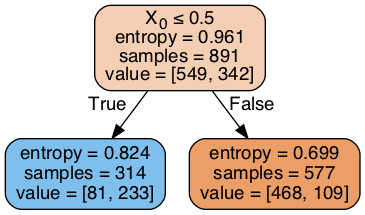

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Первый признак по которому алгоритм разбил данные это пол

Посмотрим сколько выживших среди женщин и мужчин

In [14]:
titanic.groupby("Survived")["Sex"].count()

Survived
0    549
1    342
Name: Sex, dtype: int64

In [18]:
information_gain(549, 342, 81, 233, 468, 109)

0.2176601066606142

In [19]:
x = 549
y = 342
x1 = 81
y1 = 233
x2 = 468
y2 = 109
t = x + y
entropy(x1, y1) * (x1 + y1) / t, entropy(x2, y2) * (x2 + y2) / t, entropy(x, y)

(0.2902667712838036, 0.45278102393122904, 0.9607079018756469)

##### Обучите DecisionTreeClassifier() с параметром max_depth=2, criterion="entropy"

In [67]:
# your code here

визуализируем результат

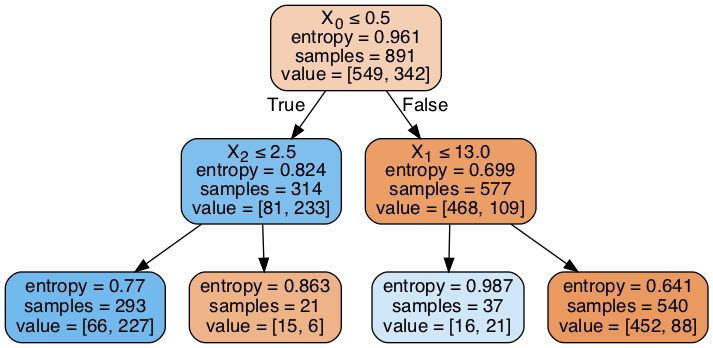

In [21]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [22]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Видно, что женщин алгоритм разбил по признаку SibSp, мужчин по признаку Age

In [25]:
titanic.groupby(["SibSp", "Survived"])["Sex"].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Sex, dtype: int64

In [26]:
information_gain(549, 342, 398+97+15, 210+112+13, 12+15+5+7, 4+3)

0.010126533258115078

Загрузим данные о ирисах

In [27]:
iris = datasets.load_iris()

Обучим решающее дерево с параметрами max_depth=1, criterion="entropy" и визуализируем результат

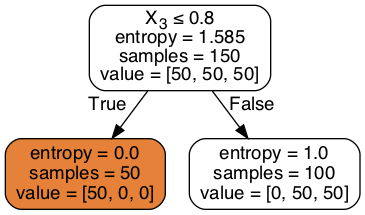

In [29]:
clf = DecisionTreeClassifier(max_depth=1, criterion="entropy")
clf.fit(iris.data, iris.target)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

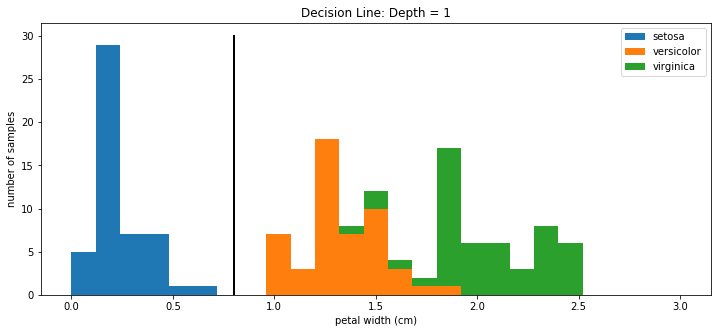

In [31]:
import seaborn
plt.figure(1,figsize=(12,5))
plt.title("Decision Line: Depth = 1")
plt.xlabel(iris.feature_names[3])
plt.ylabel("number of samples")

data_t0 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 0])
data_t1 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 1])
data_t2 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 2])

plt.hist([data_t0[:,3], data_t1[:,3], data_t2[:,3]], label=iris.target_names, range=(0,3), bins=25, stacked=True)
plt.plot([0.8, 0.8],[0,30],linewidth=2, color='k')
plt.legend(loc='upper right')

Выберем max_depth=2

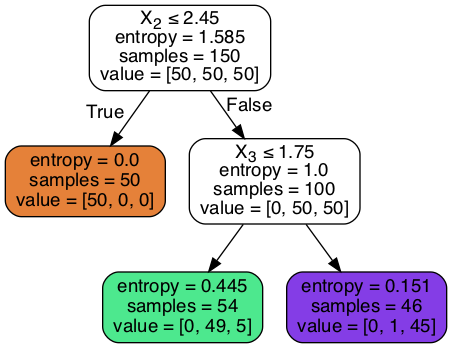

In [32]:
clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
clf.fit(iris.data, iris.target)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

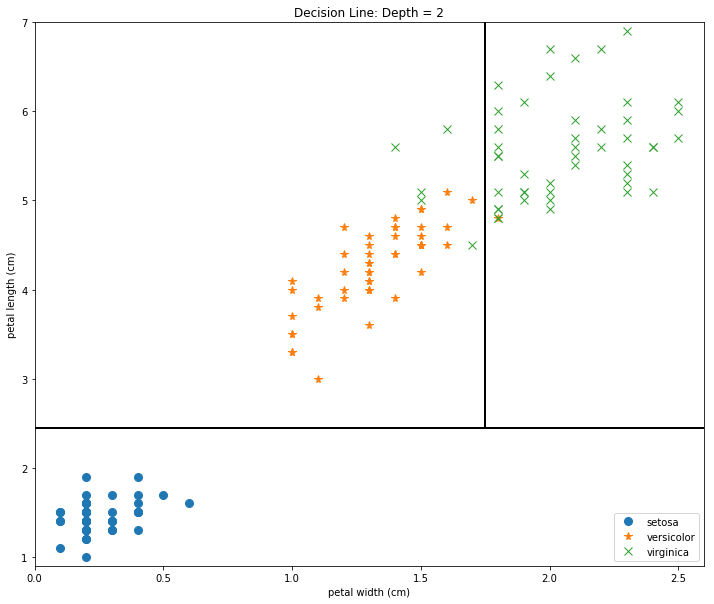

In [33]:
plt.figure(2,figsize=(12,10))
plt.title("Decision Line: Depth = 2")
plt.xlabel(iris.feature_names[3])
plt.ylabel(iris.feature_names[2])

data_t0 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 0])
data_t1 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 1])
data_t2 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 2])

plt.plot(data_t0[:,3], data_t0[:,2], 'o', label=iris.target_names[0], markersize=8)
plt.plot(data_t1[:,3], data_t1[:,2], '*', label=iris.target_names[1], markersize=8)
plt.plot(data_t2[:,3], data_t2[:,2], 'x', label=iris.target_names[2], markersize=8)


plt.ylim([0.9,7.])
plt.xlim([0,2.6])
plt.plot([0,2.6],[2.45,2.45],linewidth=2, color='k')
plt.plot([1.75, 1.75],[2.45,7.],linewidth=2, color='k')

plt.legend(loc='lower right')

max_depth=3

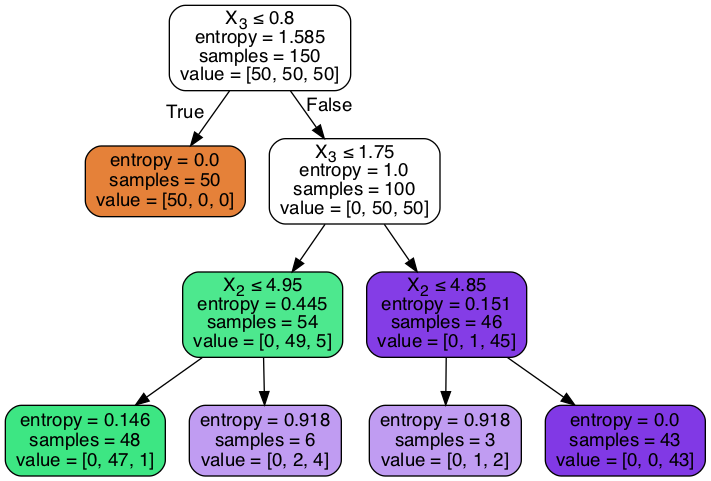

In [34]:
clf = DecisionTreeClassifier(max_depth=3, criterion="entropy", )
clf.fit(iris.data, iris.target)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

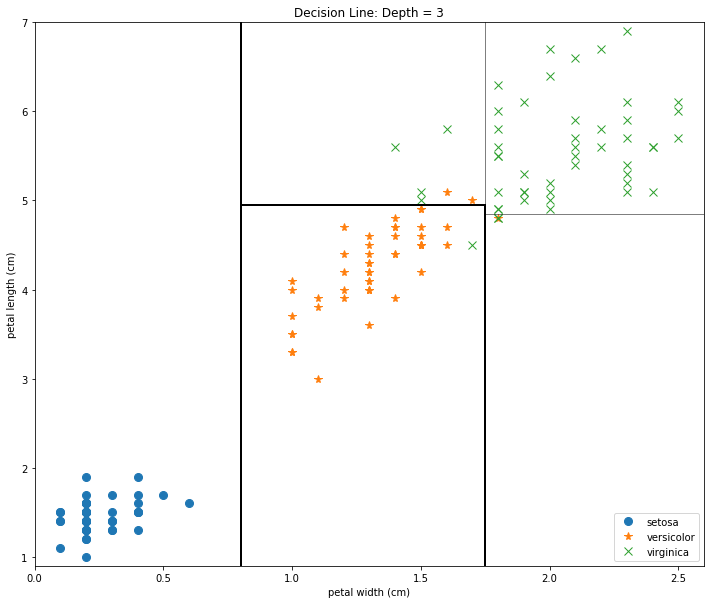

In [35]:
plt.figure(3,figsize=(12,10))
plt.title("Decision Line: Depth = 3")
plt.xlabel(iris.feature_names[3])
plt.ylabel(iris.feature_names[2])

data_t0 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 0])
data_t1 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 1])
data_t2 = np.array([row for i,row in enumerate(iris.data) if iris.target[i] == 2])

plt.plot(data_t0[:,3], data_t0[:,2], 'o', label=iris.target_names[0], markersize=8)
plt.plot(data_t1[:,3], data_t1[:,2], '*', label=iris.target_names[1], markersize=8)
plt.plot(data_t2[:,3], data_t2[:,2], 'x', label=iris.target_names[2], markersize=8)

plt.plot([0.8, 0.8],[0.9,7.],linewidth=2, color='k')
plt.plot([1.75, 1.75],[0.9,4.95],linewidth=2, color='k')
plt.plot([1.75, 1.75],[4.95,7.],linewidth=0.5, color='k')
plt.ylim([0.9,7.])
plt.plot([0.8, 1.75],[4.95,4.95],linewidth=2, color='k')
plt.plot([1.75, 2.6],[4.85,4.85],linewidth=0.5, color='k')
plt.xlim([0,2.6])

plt.legend(loc='lower right')

не будем выбирать max_depth

обучим решающее дерево и посмотрим на результат. что произошло?

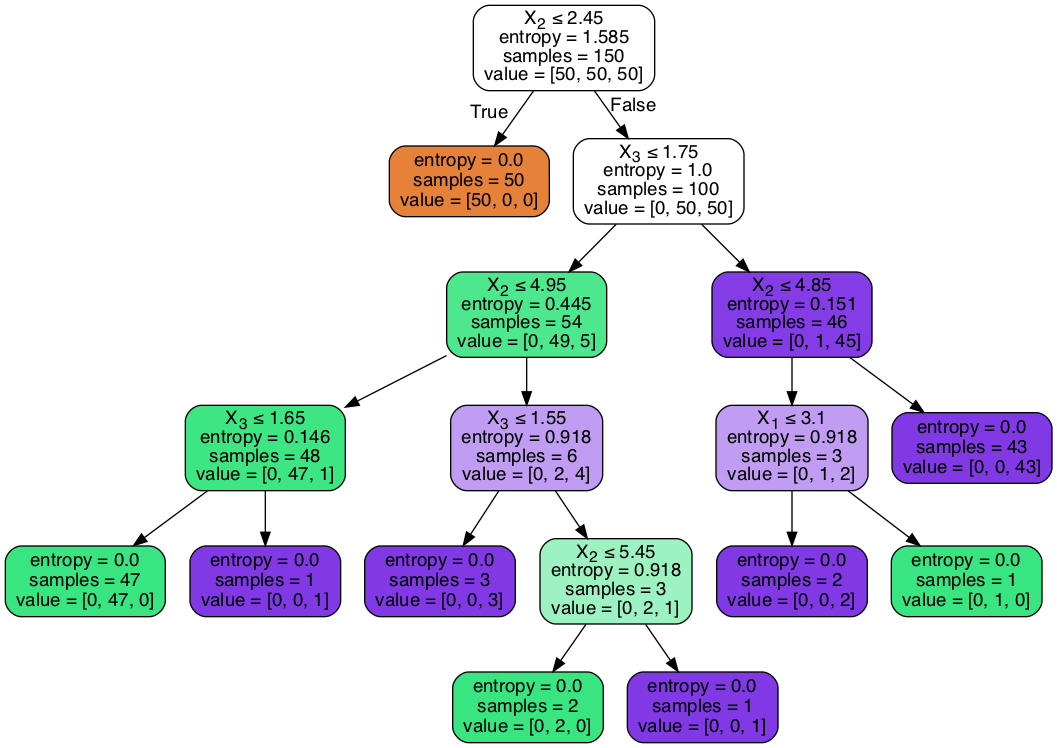

In [36]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(iris.data, iris.target)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

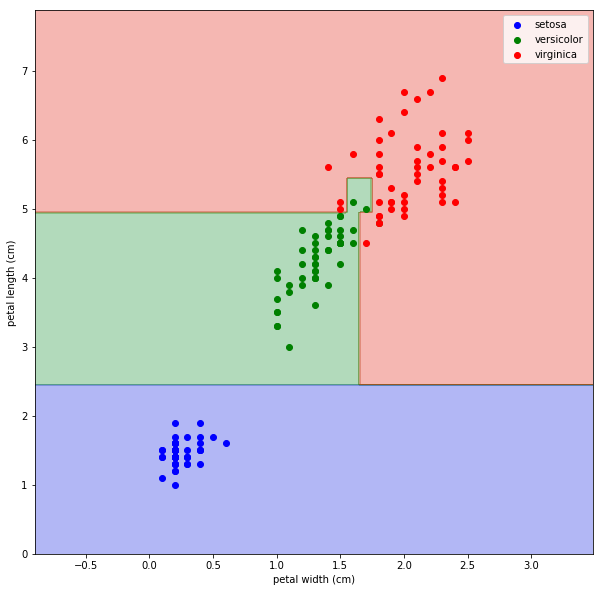

In [37]:
n_classes = 3
plot_colors = "bgr"
plot_step = 0.02
cdict = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (0.5, 0.6, 0.6),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 1.0, 1.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap('custom1', cdict)

plt.figure(4,figsize=(10,10))

pair = [3,2]
X = iris.data[:, pair]
y = iris.target

clf = DecisionTreeClassifier().fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z,cmap=cmap,alpha=0.3)

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=cmap)
plt.axis("tight")
plt.legend()

Для регрессии воспользуемся данными о прокате велосипедов. 

Скачать и почитать подробнее можено здесь
https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

In [40]:
bikes = pd.read_csv('bike.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


будем использовать лишь один признак - температуру

Text(0, 0.5, 'bikes')

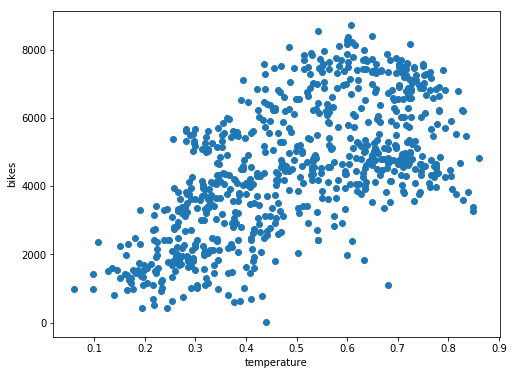

In [43]:
plt.figure(figsize=(8,6))
plt.plot(bikes['temp'], bikes['cnt'], 'o')
plt.xlabel('temperature')
plt.ylabel('bikes')

In [56]:
regressor = DecisionTreeRegressor(max_depth=1)
regressor.fit(np.array([bikes['temp']]).T, bikes['cnt'])

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [57]:
regressor.predict(np.array([0.8]).reshape(-1, 1))

array([5502.27126437])

In [58]:
regressor.predict(np.array([0.01]).reshape(1, -1))

array([3037.80743243])

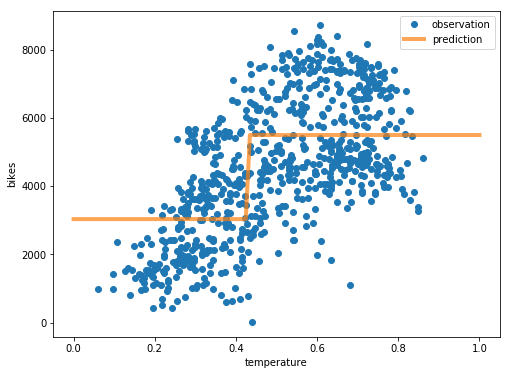

In [59]:
xx = np.array([np.linspace(0, 1, 100)]).T

plt.figure(figsize=(8,6))
plt.plot(bikes['temp'], bikes['cnt'], 'o', label='observation')
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction')
plt.xlabel('temperature')
plt.ylabel('bikes')
plt.legend()
plt.show()

In [61]:
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(np.array([bikes['temp']]).T, bikes['cnt'])

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

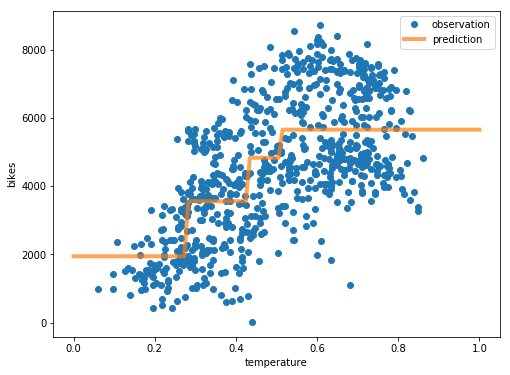

In [62]:
xx = np.array([np.linspace(0, 1, 100)]).T

plt.figure(figsize=(8,6))
plt.plot(bikes['temp'], bikes['cnt'], 'o', label='observation')
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction')
plt.xlabel('temperature')
plt.ylabel('bikes')
plt.legend()
plt.show()

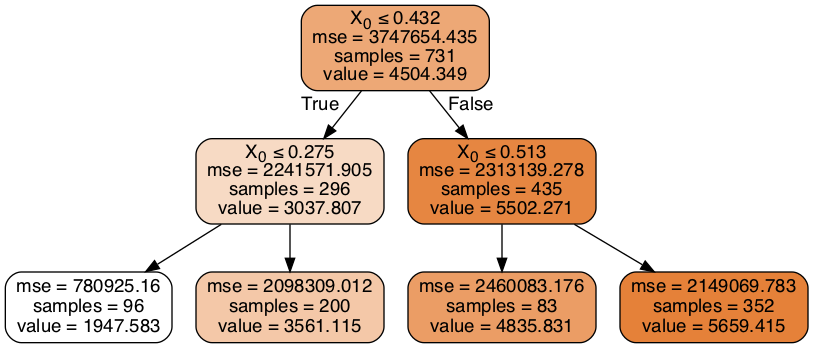

In [63]:
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [64]:
bikes[bikes['temp'] <= 0.432]["cnt"].mean()

3037.8074324324325